In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

In [2]:
df = pd.read_csv("./data/flights.csv")
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

- get the shape of data 

In [3]:
df.shape

(271940, 20)

- get all the columns 

In [5]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [6]:
df.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [7]:
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

- filter NaN(Not a number)

In [9]:
df[['DepDel15']][df.DepDel15.isna()]

,DepDel15
171,NaN
359,NaN
429,NaN
545,NaN
554,NaN
...,...
271410,NaN
271607,NaN
271634,NaN
271671,NaN


- fill Nan with a value

In [10]:
df["DepDel15"].unique()

array([ 0.,  1., nan])

- what to fill here in NaN
- lets put Departure Delay 15 with Departure Delay

In [12]:
df[['DepDelay','DepDel15']]

,DepDelay,DepDel15
0,4,0.0
1,3,0.0
2,-3,0.0
3,35,1.0
4,-1,0.0
...,...,...
271935,1,0.0
271936,24,1.0
271937,30,1.0
271938,-5,0.0


In [18]:
df[['DepDelay','DepDel15']][df.DepDel15.isna()].describe()

,DepDelay,DepDel15
count,2761.0,0.0
mean,0.0,NaN
std,0.0,NaN
min,0.0,NaN
25%,0.0,NaN
50%,0.0,NaN
75%,0.0,NaN
max,0.0,NaN


- that's enough info.. put 0 in Nan

In [19]:
df.DepDel15 = df.DepDel15.fillna(value=0)

- count total NaN after fillna

In [20]:
df.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## Plot distribution

In [35]:
def plot_distribution(dataset):
    try:
        print(dataset.name)
    except Exception as e:
        pass
    min_value = dataset.min()
    max_value = dataset.max()
    mean_value = dataset.mean()
    median_value = dataset.median()
    mode_value = dataset.mode()[0]
    
    print(f"""
    Minimum Value : {min_value} 
    Maximum Value : {max_value}
    Median        : {median_value}
    Mode Value    : {mode_value}
    Mean Value    : {mean_value}
    """)
    
    fig, ax = plt.subplots(3,1,figsize=(12,12))
    
    ax[0].hist(dataset.values)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)


    ax[1].boxplot(dataset,vert=False)
    ax[1].set_xlabel('Value')
    
    sns.distplot(dataset,kde=True,hist=True)
    ax[2].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)
    
    fig.suptitle(dataset.name)

    fig.show()

ArrDelay

    Minimum Value : -75 
    Maximum Value : 1440
    Median        : -3.0
    Mode Value    : 0
    Mean Value    : 6.496649996322718
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-35-40f0a457ade0>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


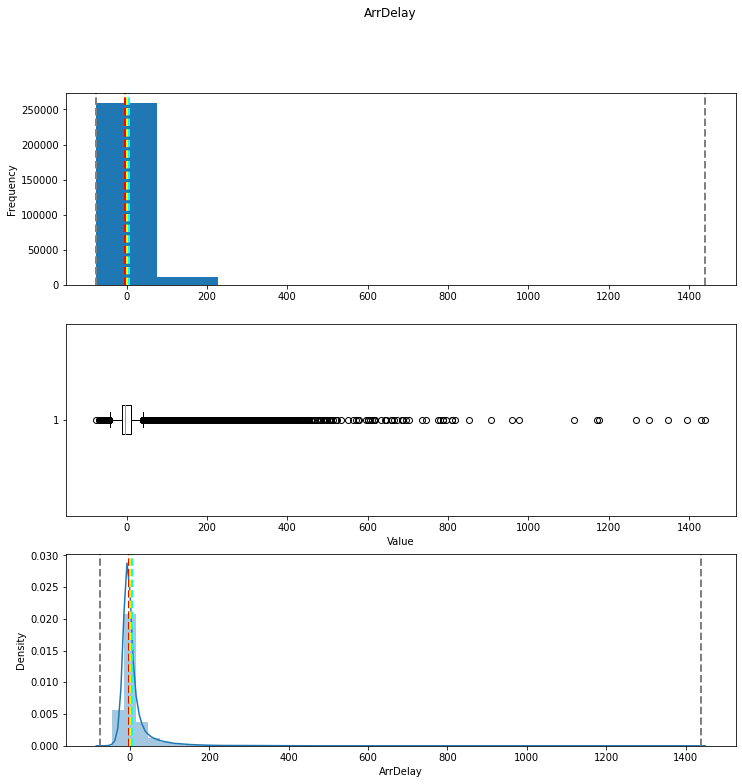

In [36]:
plot_distribution(df['ArrDelay'])

DepDelay

    Minimum Value : -63 
    Maximum Value : 1425
    Median        : -1.0
    Mode Value    : -3
    Mean Value    : 10.350448628373906
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-35-40f0a457ade0>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


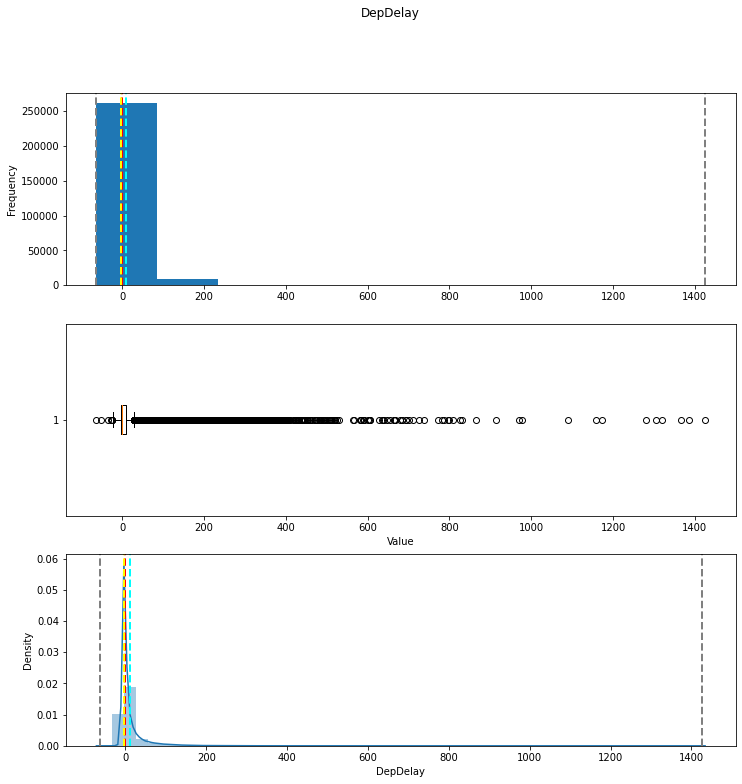

In [37]:
plot_distribution(df['DepDelay'])

- There are a lot of outliers in both of them
- need to remove them
- ArrDel15, DepDel15 both are binary .. the distribution wont work

### Amputing data removing outliers

ArrDelay

    Minimum Value : -32 
    Maximum Value : 37
    Median        : -4.0
    Mode Value    : 0
    Mean Value    : -2.6575340200730833
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-30-a6bc4f866037>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


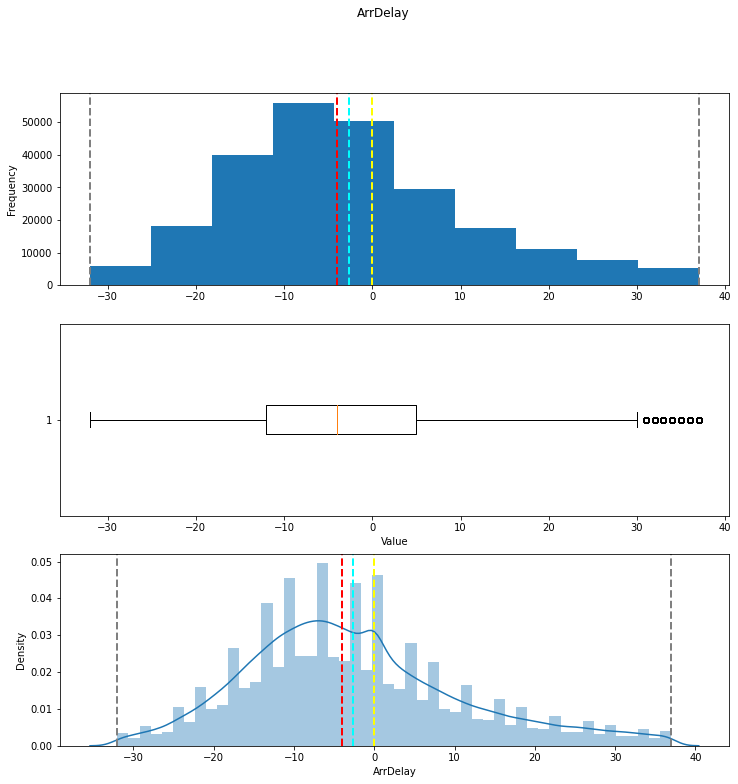

In [39]:
df = df[(df['ArrDelay'] > df['ArrDelay'].quantile(0.01)) & (df['ArrDelay'] < df['ArrDelay'].quantile(0.90))]
plotDistribution(df['ArrDelay'])

DepDelay

    Minimum Value : -11 
    Maximum Value : 16
    Median        : -2.0
    Mode Value    : -3
    Mean Value    : -0.9216920012873314
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-30-a6bc4f866037>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


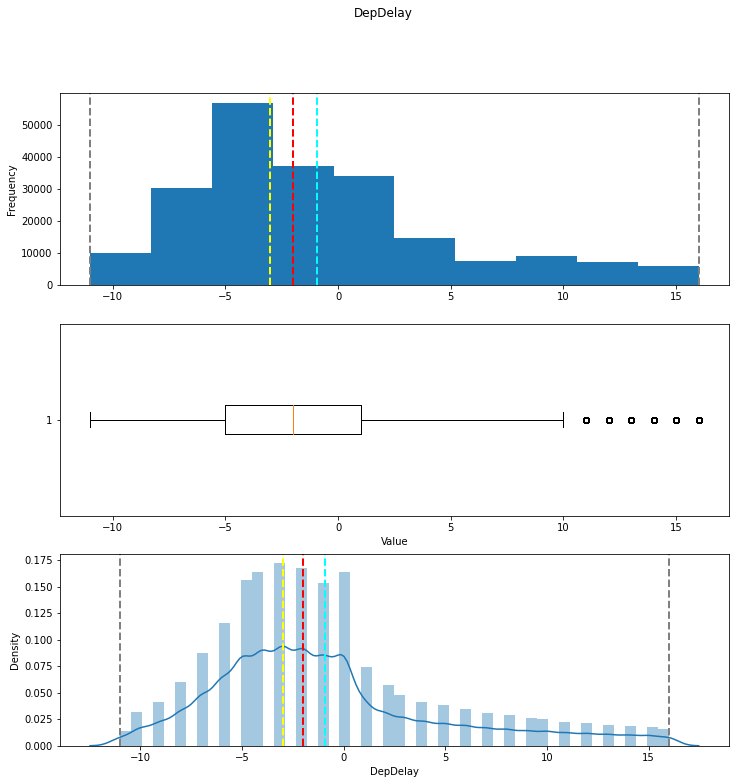

In [40]:
df = df[(df['DepDelay'] > df['DepDelay'].quantile(0.01)) & (df['DepDelay'] < df['DepDelay'].quantile(0.90))]
plotDistribution(df['DepDelay'])

## Based on exercise checking delay fields

In [41]:
delayFields = ['ArrDelay','DepDelay']

In [42]:
df[delayFields].mean()

ArrDelay   -5.030276
DepDelay   -0.921692
dtype: float64

- Plotting arrival and departure delay box plot for different carriers

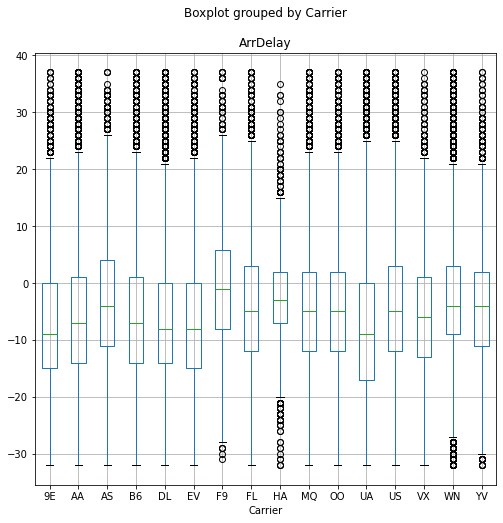

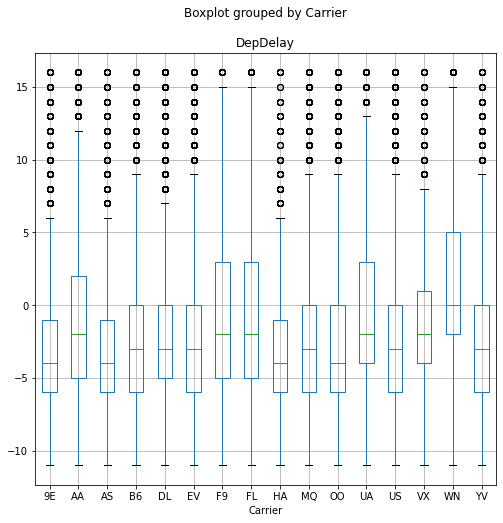

In [46]:
for col in delayFields:
    df.boxplot(column=col, by='Carrier', figsize=(8,8))

- Plotting arrival and departure delay box plot for different days of week

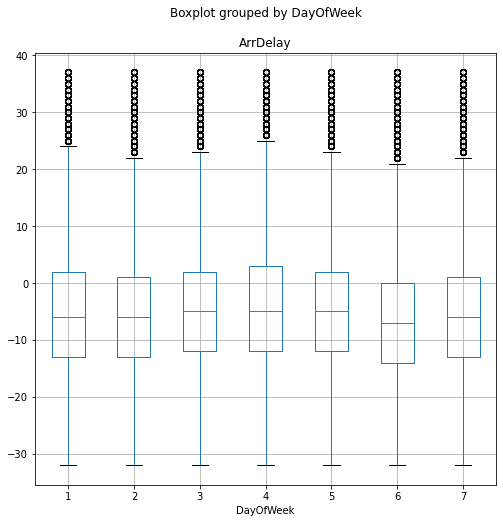

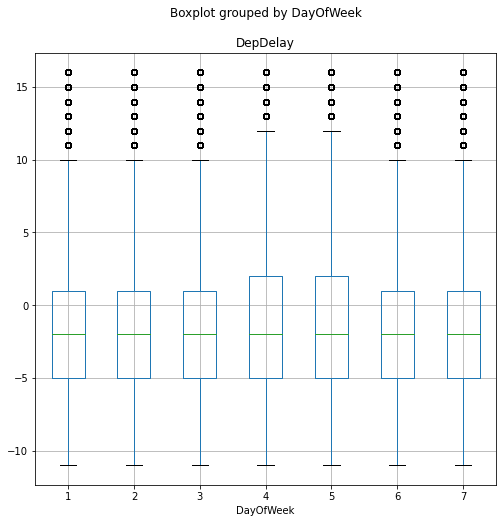

In [47]:
for col in delayFields:
    df.boxplot(column=col, by='DayOfWeek', figsize=(8,8))

<AxesSubplot:xlabel='OriginAirportName'>

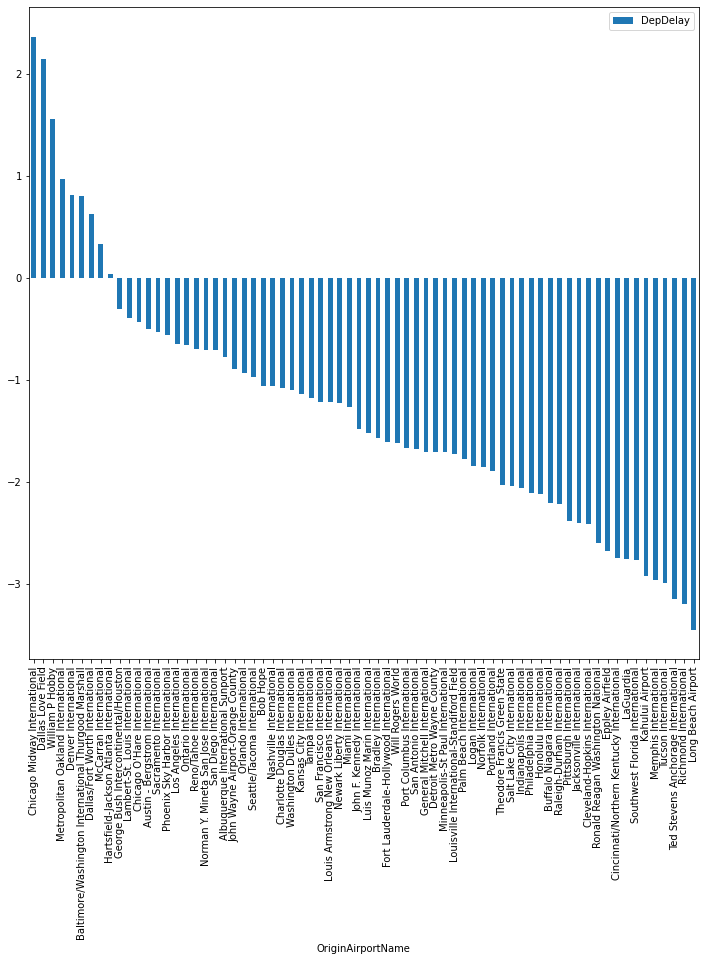

In [48]:
pd.DataFrame(
    df\
    .groupby(['OriginAirportName'])['DepDelay']\
    .mean()
)\
.sort_values('DepDelay',ascending=False)\
.plot(kind='bar', figsize=(12,12))

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

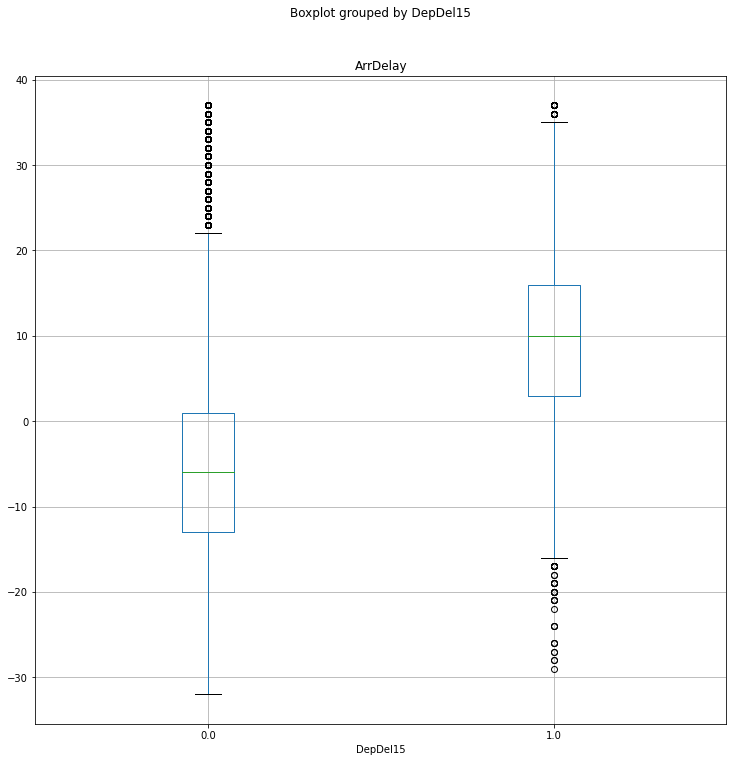

In [49]:
df.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))